# Netflix Data Analysis
Authors: Alex Arce, Lunden Mandigo, Tyrone Pettygrue 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
imdb_movies = pd.read_csv('merged_movie_imdb.csv')


## Data Collection and Merging
Information on where we got the data and steps for merging, trimming, and uploading

### Data Description

**IMDB Movies**

In [3]:
print(imdb_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188554 entries, 0 to 188553
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      188554 non-null  int64  
 1   tconst          188554 non-null  object 
 2   titleType       188554 non-null  object 
 3   primaryTitle    188553 non-null  object 
 4   originalTitle   188553 non-null  object 
 5   isAdult         188554 non-null  int64  
 6   startYear       188554 non-null  int64  
 7   endYear         188554 non-null  object 
 8   runtimeMinutes  188554 non-null  object 
 9   genres          188554 non-null  object 
 10  averageRating   188554 non-null  float64
 11  numVotes        188554 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 17.3+ MB
None


In [4]:
imdb_movies.genres.str.startswith("Drama").value_counts()

False    140253
True      48301
Name: genres, dtype: int64

### Have the number of movies released per year changed over time?

The number of movies released per year steadily increases from 2001 until 2019. The rate of change is about 500 more movies per year during these years. In 2020, there is a major dip in movies released, likely due to the pandemic. The rate of growth then returns to pre-pandemic levels, and the number of movies released per year increased until 2022. From 2022-2024 there is a decline in the number of movies released per year, with the numnber of releases in 2024 close to 2020 levels. So what happened in 2024?

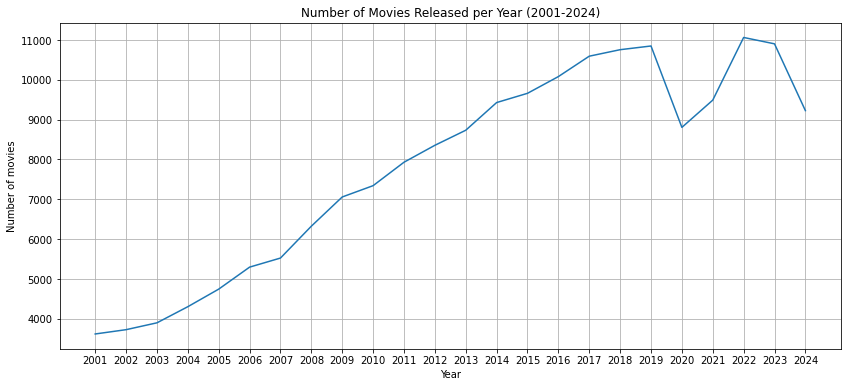

In [5]:
# Count the number of movies per year
movies_per_year = imdb_movies['startYear'].value_counts().sort_index()

# filter out the year 2025
movies_per_year = movies_per_year[movies_per_year.index != 2025]

# Plot the number of movies per year
plt.figure(figsize=(14, 6))
plt.plot(movies_per_year)
plt.xticks(np.arange(2001, 2025, 1))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of Movies Released per Year (2001-2024)')
plt.grid()
plt.show()

### What is the relationship between number of votes and the rating of the movie?
There are some considerable outliers that are skewing the distribution of the data. Before removing these outliers, there is very little correlation between average rating and number of votes (R^2 = 0.002). Even after removing the outliers, there is no significant correlation between average rating and number of votes.

But what about from the year 2024?
Still nothing

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averageRating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     396.2
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           4.61e-88
Time:                        17:05:29   Log-Likelihood:            -3.4346e+05
No. Observations:              188554   AIC:                         6.869e+05
Df Residuals:                  188552   BIC:                         6.870e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2541      0.003   1804.546      0.000       6.247       6.261
numVotes    1.754e-06   8.81e-08     19.904      0.000    1.58e-06    1.93e-06
==============================================================================
Omnibus:                     4907.598   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5300.290
Skew:                          -0.410   Prob(JB):                         0.00
Kurtosis:                       3.050   Cond. No.                     3.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

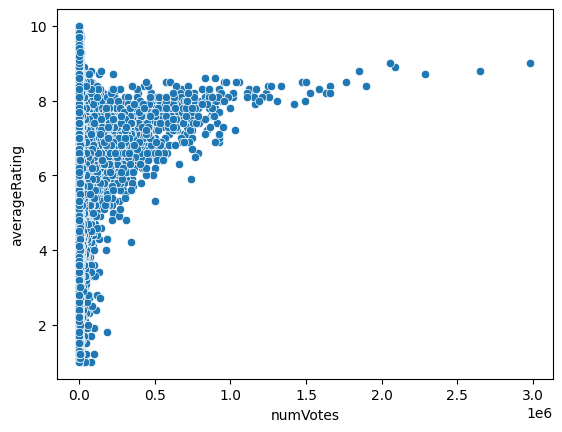

In [8]:
# plot numVote vs averageRating
sns.scatterplot(data=imdb_movies,x='numVotes',y='averageRating')

# create linear model
model0 = smf.ols("averageRating ~ numVotes", data=imdb_movies).fit()
model0.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averageRating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     337.7
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           2.32e-75
Time:                        17:20:41   Log-Likelihood:            -3.4341e+05
No. Observations:              188516   AIC:                         6.868e+05
Df Residuals:                  188514   BIC:                         6.868e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2534      0.003   1801.220      0.000       6.247       6.260
numVotes    1.951e-06   1.06e-07     18.377      0.000    1.74e-06    2.16e-06
==============================================================================
Omnibus:                     4885.773   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5275.039
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       3.049   Cond. No.                     3.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

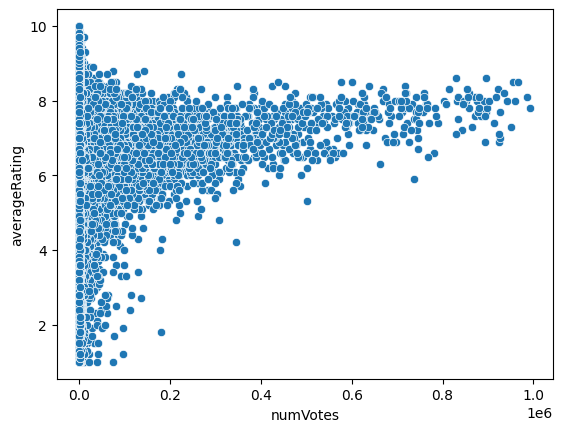

In [14]:
# remove outliers
imdb_movies1 = imdb_movies[imdb_movies['numVotes'] < 1000000]
sns.scatterplot(data=imdb_movies1,x='numVotes',y='averageRating')

model1 = smf.ols("averageRating ~ numVotes", data=imdb_movies1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averageRating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1113
Date:                Sat, 22 Feb 2025   Prob (F-statistic):              0.739
Time:                        17:27:48   Log-Likelihood:                -17579.
No. Observations:                9227   AIC:                         3.516e+04
Df Residuals:                    9225   BIC:                         3.518e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6050      0.017    386.848      0.000       6.572       6.639
numVotes   -4.212e-07   1.26e-06     -0.334      0.739    -2.9e-06    2.05e-06
==============================================================================
Omnibus:                      236.593   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.611
Skew:                          -0.397   Prob(JB):                     2.31e-55
Kurtosis:                       2.841   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

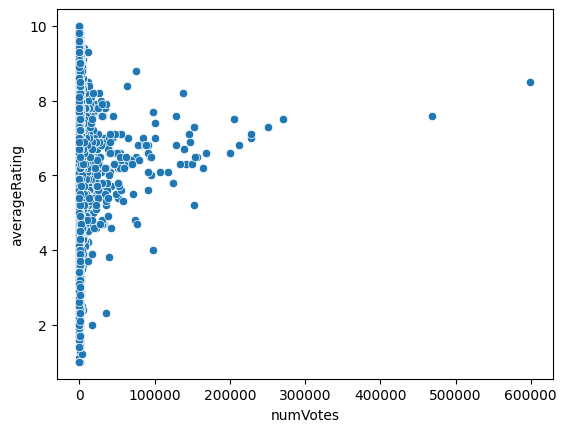

In [15]:
movies_2024 = imdb_movies[imdb_movies['startYear'] == 2024]

# plot numVote vs averageRating
sns.scatterplot(data=movies_2024,x='numVotes',y='averageRating')

# create linear model
model = smf.ols("averageRating ~ numVotes", data=movies_2024).fit()
model.summary()


### What does the distribution look like for high, medium, and low rated movies? How many votes do each category of movie get?
The number of mediumm rated movies decreased in 2024. All years , there are more medium rated movies than high rated movies. In 2024 the gap decreases significantly. Did directors stop making decent movies? Let's look at the ratings per genre to help us understand.

The number of votes for medium rated moves was significantly lower than high rated movies from 2001-2020. In 2020 this trend changes. The number of votes for medium and high rated movies become much more similar.

rating_category   Low  Medium  High
startYear                          
2001              288    2443   889
2002              261    2440  1027
2003              326    2500  1074
2004              315    2744  1246
2005              352    2982  1412
2006              449    3322  1527
2007              436    3439  1651
2008              537    3846  1943
2009              625    4231  2203
2010              644    4460  2239
2011              664    4744  2523
2012              684    5034  2638
2013              747    5281  2706
2014              733    5687  3009
2015              827    5862  2972
2016              863    6077  3141
2017              945    6399  3249
2018             1003    6626  3127
2019             1053    6595  3201
2020              956    5213  2637
2021              951    5536  3003
2022              904    6385  3774
2023              921    6134  3848
2024              682    4726  3819


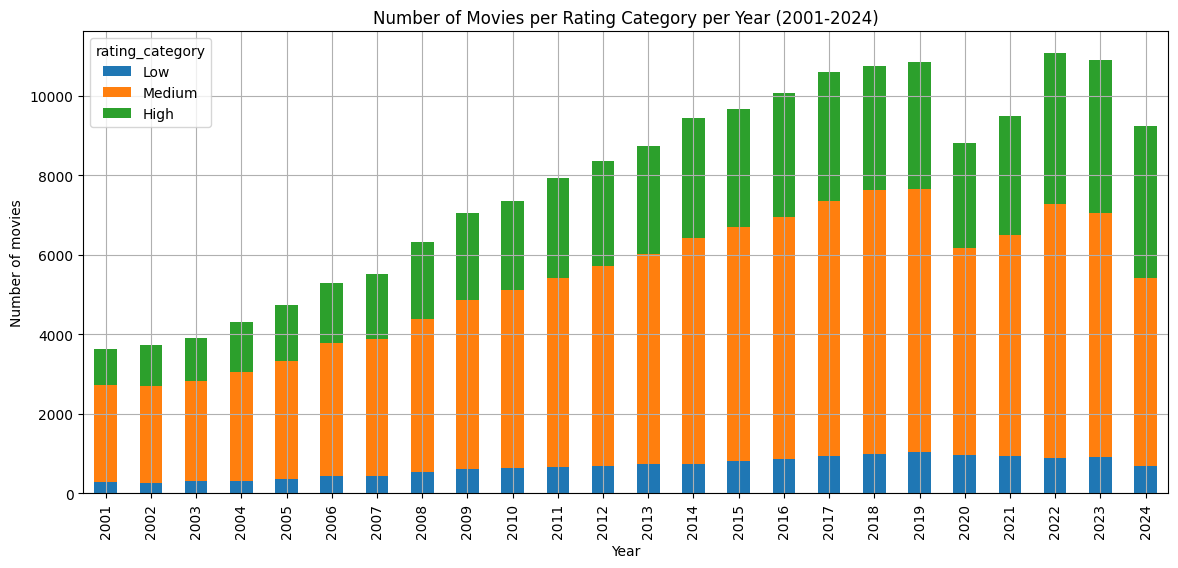

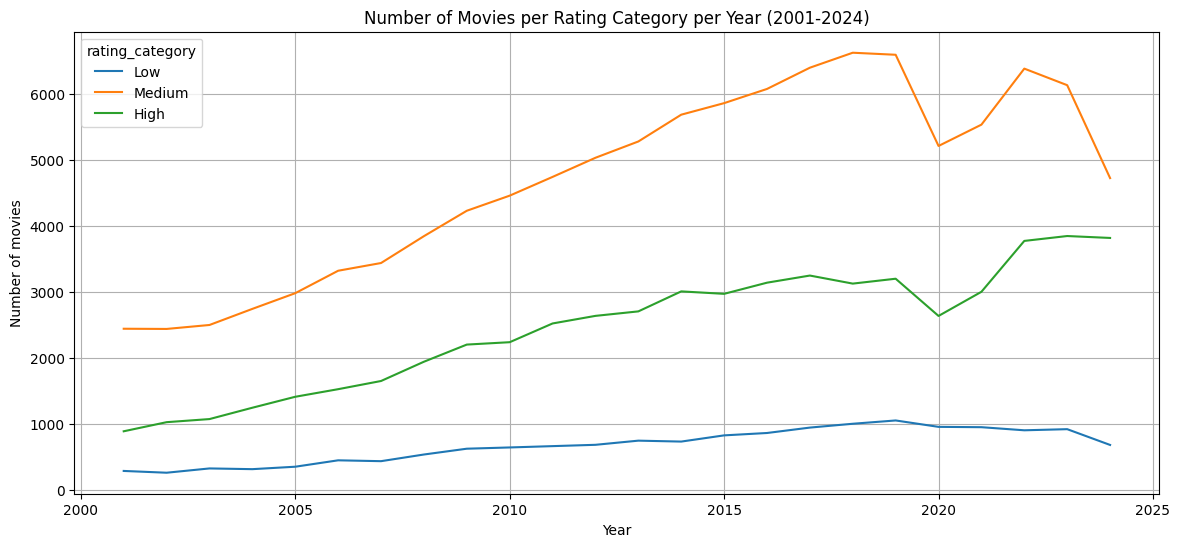

In [25]:
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
imdb_movies['rating_category'] = pd.cut(imdb_movies['averageRating'], bins=bins, labels=labels)

# Count the number of movies per rating category per year
movies_per_year = imdb_movies.groupby(['startYear', 'rating_category']).size().unstack().fillna(0)
movies_per_year = movies_per_year[movies_per_year.index != 2025]
print(movies_per_year)

# Plot the number of movies per rating category per year
plt.figure(figsize=(14, 6))
movies_per_year.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of Movies per Rating Category per Year (2001-2024)')
plt.grid()
plt.show()

# plot number of movies per rating category as line plot
plt.figure(figsize=(14, 6))
movies_per_year.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of Movies per Rating Category per Year (2001-2024)')
plt.grid()
plt.show()

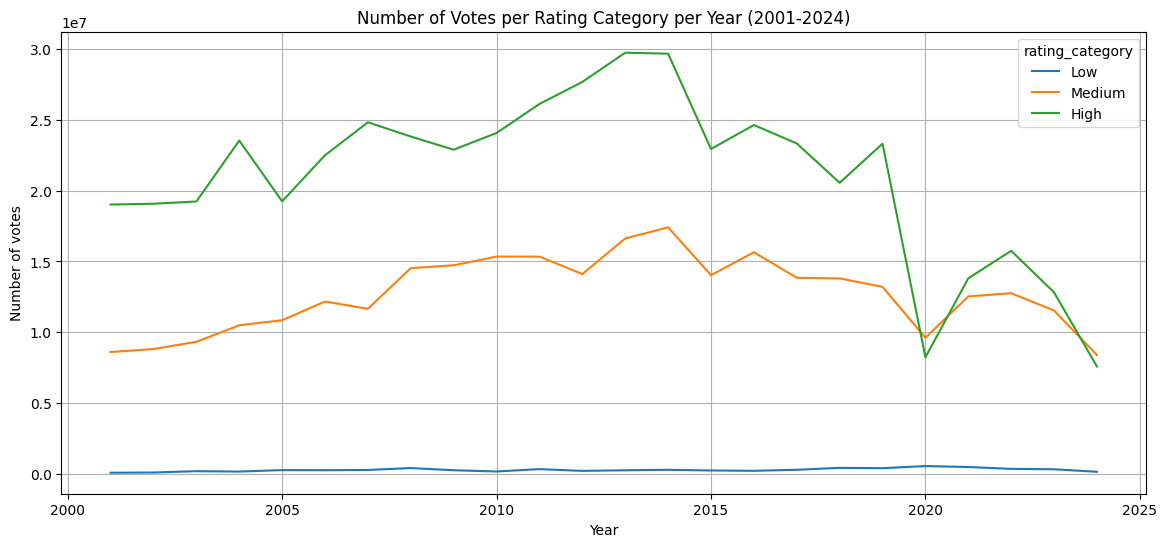

In [24]:
# plot number of votes per rating category as a line plot
votes_per_year = imdb_movies.groupby(['startYear', 'rating_category'])['numVotes'].sum().unstack().fillna(0)
votes_per_year = votes_per_year[votes_per_year.index != 2025]
plt.figure(figsize=(14, 6))
votes_per_year.plot(kind='line', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Number of votes')
plt.title('Number of Votes per Rating Category per Year (2001-2024)')
plt.grid()
plt.show()